# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [2]:
data_path = "/Users/pamirozsuna/Desktop/pamir_ma/SCZ-FC-modelling"

In [3]:
def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

In [4]:
#ds = Dataset(datasetName = 'scz', normalizeCmats = None)
C_data = np.load(data_path+"/AvgCmatrixHC.npy")
D_data = np.load(data_path+"/AvgDmatrixHC.npy")

In [5]:
C_data.shape

(36, 94, 94)

In [6]:
Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

In [7]:
Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

In [8]:
FCs = np.load(data_path+"/AvgFmatrixHC.npy")
BOLDs = np.load(data_path+"/AvgTmatrixHC.npy")

In [9]:
FC_new = averageMat(FCs)
FC_new1 = filterSubcortical(FC_new)
FC_new.shape
FC_new1.shape
#print(FC_new1)

BOLDs.shape
#Bold_new = averageMat(BOLDs)
#Bold_new1 = filterSubcortical(Bold_new)
#Bold_new1.shape

(36, 94, 145)

In [10]:
#FC_new2 = filterSubcortical(FCs)
#FC_new2.shape
#GW_FC_mean = np.mean(FC_new2, axis = 0)
#print(GW_FC_mean.shape)
#print(GW_FC_mean)
#GW_FC_mean = np.mean(ds.FCs, axis=0) # Average FC GW
#ds.FCs = []
#ds.FCs.append(GW_FC_mean)
#ds.FCs.append(np.mean(dataDict_fc, axis=0)) # Add average FC HCP
#print("ds FCs shape: " + str(np.shape(ds.FCs)))

In [11]:
#GW_FC_mean = np.mean(FCs, axis=0) # Average FC GW
#FCs_new = []
#FCs_new.append(GW_FC_mean)
#FCs_new.append(np.mean(Fmatrix, axis=0)) # Add average FC HCP
#print("ds FCs shape: " + str(np.shape(FCs_new)))

In [12]:
wc = WCModel(Cmat = Cmat, Dmat = Dmat)

In [83]:
wc.params['duration'] = 2*1000
wc.params['exc_ext'] = 0.45
wc.params['c_excinh'] = 10.333333333333334
wc.params['c_inhexc'] = 9.666666666666666
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 1.843
wc.params['sigma_ou'] = 4.2819e-05

wc.run(chunkwise=True)

(0, 200)

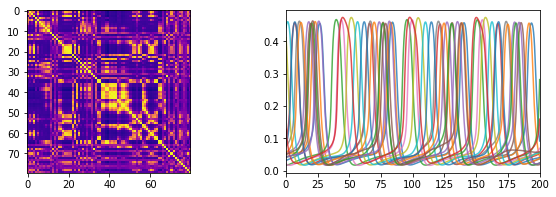

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(wc.exc[:,:-2000]))
#axs[0].imshow(func.fc(wc.BOLD.BOLD))
axs[1].plot(wc.t, wc.exc[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)

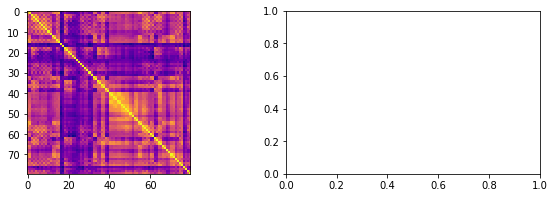

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(FC_new1)
#axs[1].plot(wc.t, wc.exc[::5, :].T, alpha=0.8);
#axs[1].set_xlim(0, 200)

In [18]:
print(FC_new1)
tmp = np.array(FC_new1)
tmp = []
tmp.append(FC_new1)
#print(len(tmp))
print(tmp)
tmp1 =[]
for i in range(0,80):
    tmp1.append(FC_new1[i])
print(len(tmp1))

[[1.         0.77611285 0.61662492 ... 0.37592054 0.53578837 0.58636715]
 [0.77611285 1.         0.41604315 ... 0.36243225 0.41003004 0.536187  ]
 [0.61662492 0.41604315 1.         ... 0.36867746 0.54010876 0.525944  ]
 ...
 [0.37592054 0.36243225 0.36867746 ... 1.         0.28001736 0.35182146]
 [0.53578837 0.41003004 0.54010876 ... 0.28001736 1.         0.6092295 ]
 [0.58636715 0.536187   0.525944   ... 0.35182146 0.6092295  1.        ]]
[array([[1.        , 0.77611285, 0.61662492, ..., 0.37592054, 0.53578837,
        0.58636715],
       [0.77611285, 1.        , 0.41604315, ..., 0.36243225, 0.41003004,
        0.536187  ],
       [0.61662492, 0.41604315, 1.        , ..., 0.36867746, 0.54010876,
        0.525944  ],
       ...,
       [0.37592054, 0.36243225, 0.36867746, ..., 1.        , 0.28001736,
        0.35182146],
       [0.53578837, 0.41003004, 0.54010876, ..., 0.28001736, 1.        ,
        0.6092295 ],
       [0.58636715, 0.536187  , 0.525944  , ..., 0.35182146, 0.6092295 ,


In [19]:
ds = Dataset("gw", fcd = True)
print(FC_new1)
tmp = []
tmp.append(FC_new1)
scores = [func.matrix_correlation(func.fc(wc.exc[:, -int(5000/wc.params['dt']):]), fcemp) for fcemp in tmp1]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))
print(FC_new1.shape)

[[1.         0.77611285 0.61662492 ... 0.37592054 0.53578837 0.58636715]
 [0.77611285 1.         0.41604315 ... 0.36243225 0.41003004 0.536187  ]
 [0.61662492 0.41604315 1.         ... 0.36867746 0.54010876 0.525944  ]
 ...
 [0.37592054 0.36243225 0.36867746 ... 1.         0.28001736 0.35182146]
 [0.53578837 0.41003004 0.54010876 ... 0.28001736 1.         0.6092295 ]
 [0.58636715 0.536187   0.525944   ... 0.35182146 0.6092295  1.        ]]


ValueError: input array must be 2-d

In [20]:
print(FC_new1.shape)
print(len(ds.FCs))

(80, 80)
5


In [21]:
print(ds.FCs)

[array([[1.        , 0.90137329, 0.33093662, ..., 0.24499924, 0.32090422,
        0.32080727],
       [0.90137329, 1.        , 0.31479467, ..., 0.17812425, 0.27945146,
        0.32748179],
       [0.33093662, 0.31479467, 1.        , ..., 0.14337527, 0.35548167,
        0.39176176],
       ...,
       [0.24499924, 0.17812425, 0.14337527, ..., 1.        , 0.14436633,
        0.18543802],
       [0.32090422, 0.27945146, 0.35548167, ..., 0.14436633, 1.        ,
        0.40615492],
       [0.32080727, 0.32748179, 0.39176176, ..., 0.18543802, 0.40615492,
        1.        ]]), array([[ 1.        ,  0.33118103,  0.25825882, ..., -0.16064557,
        -0.16833033,  0.09447842],
       [ 0.33118103,  1.        ,  0.46279465, ...,  0.033942  ,
         0.33746885,  0.38948219],
       [ 0.25825882,  0.46279465,  1.        , ...,  0.07708465,
         0.19106958,  0.24916755],
       ...,
       [-0.16064557,  0.033942  ,  0.07708465, ...,  1.        ,
         0.09562023,  0.12872383],
       [-

In [22]:
def calculate_gbc(fc):
    count = 0
    sum = 0
    for i in range(0,80):
        for j in range (0,80):
                sum += fc[i][j]
                count += 1
    print(count)
    return sum/80

In [81]:
print
gbc1 = calculate_gbc(tmp1)
print(gbc1)

6400
33.81387052809054


In [85]:
#gbc2 = calculate_gbc(func.fc(wc.exc[:, -int(5000/wc.params['dt']):]))
gbc2 = calculate_gbc(func.fc(wc.exc[:,:-2000]))
print(gbc2)

6400
1.5042384047674626


In [ ]:
wc.outputs.keys()

In [55]:
print(wc.BOLD.BOLD)

[[1.37345466e-10 5.42411909e-02 6.16794564e-02 ... 6.17554096e-02
  6.17471781e-02 6.17438545e-02]
 [1.37337814e-10 5.38959152e-02 6.16004898e-02 ... 6.16786185e-02
  6.16651027e-02 6.16625277e-02]
 [1.37332498e-10 5.44231951e-02 6.16952330e-02 ... 6.17681781e-02
  6.17907725e-02 6.17917800e-02]
 ...
 [1.37352493e-10 5.14371604e-02 6.09325276e-02 ... 6.10460532e-02
  6.08933523e-02 6.08759321e-02]
 [1.37341309e-10 5.37755090e-02 6.15577468e-02 ... 6.16269546e-02
  6.16385715e-02 6.16440674e-02]
 [1.37329884e-10 5.16752863e-02 6.09739510e-02 ... 6.09683495e-02
  6.09605180e-02 6.09381012e-02]]


In [64]:
print(wc.BOLD.BOLD[:, -80:])

[[0.06176044 0.06176253 0.06172367 ... 0.06175541 0.06174718 0.06174385]
 [0.06167584 0.06167837 0.0616602  ... 0.06167862 0.0616651  0.06166253]
 [0.06178027 0.0617832  0.06178388 ... 0.06176818 0.06179077 0.06179178]
 ...
 [0.06111972 0.06119783 0.06105088 ... 0.06104605 0.06089335 0.06087593]
 [0.06162986 0.06163038 0.0616545  ... 0.06162695 0.06163857 0.06164407]
 [0.06087807 0.0610082  0.06085726 ... 0.06096835 0.06096052 0.0609381 ]]
